<a href="https://colab.research.google.com/github/FranciscoJSSantos/Analise_de_Dados_do_Bolsa_Familia/blob/main/Analise_de_Dados_do_Bolsa_Familia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados do Bolsa Família
---
###Membros:
- Francisco José dos Santos Santana
- Danilo Michell Lisboa de Freitas

###LINK PARA BAIXAR A TABELA DE DADOS NO DRIVE:

- [Dataset_CadastroUnico_Sergipe](https://drive.google.com/drive/folders/1oOvuSPC41LXvvuxFS3jeKCXfFkeSWcI6?usp=sharing)



###LINKS COM ALGUMAS INFORMAÇÕES SOBRE A BASE DE DADOS

- [Mais informações sobre o cadastro único](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_cadastro_unico_semlogo.**pdf**)


- [Mais informações sobre o bolsa família](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)


##Imports necessários para funcionamento do projeto

In [214]:
#Imports Necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Análise de dados de Famílias

In [215]:
#Carrega a base de dados de familia
data_familia = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_familia_sergipe.csv")

In [226]:
df_familia = data_familia.iloc[:,[6,8,9]]

df_familia

,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam
0,58.0,1.0,1.0
1,190.0,2.0,1.0
2,100.0,1.0,1.0
3,937.0,1.0,1.0
4,25.0,2.0,1.0
...,...,...,...
82270,100.0,1.0,1.0
82271,8.0,1.0,1.0
82272,97.0,1.0,1.0
82273,880.0,1.0,1.0


##**Criação da base de dados que vamos utilizar extraidos da familia**
- Decidimos trabalhar com 3 dados, são eles:
 - vlr_renda_media_fam
 - cod_local_domic_fam
 - cod_especie_domic_fam

In [223]:
###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de Local de Domicílio
df_familia['cod_local_domic_fam'] = pd.cut(df_familia['cod_local_domic_fam'],bins=[1,2,float('inf')],right=False,labels=['Urbana','Rural'])
df_familia.rename(columns = {'cod_local_domic_fam' : 'Local de Domicílio'}, inplace = True)

#transformação de dados de Espécie do domicílio
df_familia['cod_especie_domic_fam'] = pd.cut(df_familia['cod_especie_domic_fam'],bins=[1,2,3,float('inf')],right=False,labels=['Particular Permanente','Particular improvisado','Coletivo'])
df_familia.rename(columns = {'cod_especie_domic_fam' : 'Espécie do domicílio'}, inplace = True)

#transformação de dados de valor de renda media pra grupo de renda
df_familia['vlr_renda_media_fam'] = pd.cut(df_familia['vlr_renda_media_fam'],bins=[0,100.0,200.0,float('inf')],right=False,labels=['Extrema Pobreza','Pobreza','Vulnerável'])
df_familia.rename(columns = {'vlr_renda_media_fam' : 'Grupo de renda'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

##**Transformação dos dados para qualitativo**
- Fizemos as transformações com base no diciónario de dados que nos foi disponibilizado:
 - Para **Local de Domicílio** temos: 
   - **1 - Urbano**;
   - **2 - Rural**;

 - Para **Espécie do domicílio** temos: 
   - **1 - Particular Permanente**;
   - **2 - Particular improvisado**;
   - **3 - Coletivo**;

 - Para **Espécie do domicílio** temos: 
   - **[0, 100.0] - Extrema Pobreza**;
   - **[100.1, 200.0] - Pobreza**;
   - **[200.1, infinito] - Vulnerável** ;
  

In [220]:
df_familia.describe()

,Grupo de renda,Local de Domicílio,Espécie do domicílio
count,82275,82170,82170
unique,3,2,3
top,Extrema Pobreza,Urbana,Particular Permanente
freq,49562,55464,78127


- Com algumas análises usando o método '.describe()' do pandas podemos ver existem campos nulos em Local de Domicílio e Espécie de domicílio e podemos supor que com base no dicionário de dados não existe a opção de 'nenhum local' então podemos dizer que os dados faltando seriam essas opções que não existem na base de dados. 
- Podemos também analisar a quantidade de tipos de itens que cada dado possui. 
- Também podemos notar o valor do dado e a quantidade de vezes que ele se repete.

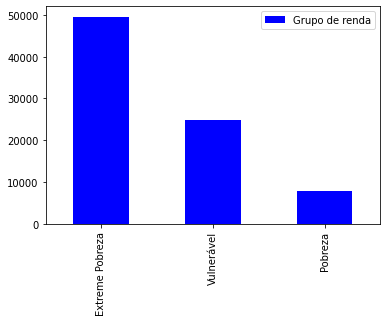

In [134]:
# Grupo de renda
# Extrema Pobreza	- 49562
# Vulnerável	- 24747
# Pobreza	- 7966

tipo_grupo_renda = df_familia['Grupo de renda'].value_counts().to_frame()
tipo_grupo_renda.plot(kind='bar',color='blue')

###Realizando uma análise grosseira da porcentagem de dados, tempos:
- **60%** na classe **Extrema Pobreza**;
- **30%** na classe **Vulnerável**;
- **10%** na classe **Pobreza**;



##**Grupo de Renda da família**


In [224]:
#Dropamos o dado "Vulnerável" pois eles não se encaixam no grupo para inclusão no bolsa família devivo a sua renda média ser acima de 200,01
grupoRenda = df_familia[df_familia['Grupo de renda'] == 'Vulnerável'].index
df_familia.drop(grupoRenda, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- Para fazer parte do programa bolsa família a família precisa estar no grupo de **Extrema pobreza** e **Pobreza**, devido a essas conclusões retiramos o grupo **Vulnerável** da base de dados para trabalhar com os dados das pessoas que irão fazer parte do programa.

In [225]:
df_familia

,Grupo de renda,Local de Domicílio,Espécie do domicílio
0,Extrema Pobreza,Urbana,Particular Permanente
1,Pobreza,Rural,Particular Permanente
2,Pobreza,Urbana,Particular Permanente
4,Extrema Pobreza,Rural,Particular Permanente
5,Extrema Pobreza,Urbana,Particular Permanente
...,...,...,...
82267,Pobreza,Urbana,Particular Permanente
82268,Extrema Pobreza,Urbana,Particular Permanente
82270,Pobreza,Urbana,Particular Permanente
82271,Extrema Pobreza,Urbana,Particular Permanente


- Depois da retirada do grupo **Vunerável** da análise diminuimos o volume de dados em **30%**.

---

#Análise de dados de Pessoas

In [144]:
# Carrega a base de dados de pessoas
data_pessoa = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_pessoas_sergipe.csv")


In [227]:
#Criando uma tabela com os dados que vamos utilizar
df_pessoa = data_pessoa.iloc[:,[5,6,7,8,11,12,23]]

In [ ]:
#transformação de dados para qualitativo

###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de cor ou raça
df_pessoa['cod_raca_cor_pessoa'] = pd.cut(df_pessoa['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,5.0,float('inf')],right=False,labels=['Branca','Preta','Amarela','Parda','Indígena'])
df_pessoa.rename(columns = {'cod_raca_cor_pessoa' : 'Cor ou raça'}, inplace = True)

#transformação de dados de sexo
df_pessoa['cod_sexo_pessoa'] = pd.cut(df_pessoa['cod_sexo_pessoa'],bins=[1.0,2.0,float('inf')],right=False,labels=['Masculino','Feminino'])
df_pessoa.rename(columns = {'cod_sexo_pessoa' : 'Sexo'}, inplace = True)

#transformação de dados de relaçao de parentesco com o RF
df_pessoa['cod_parentesco_rf_pessoa'] = pd.cut(df_pessoa['cod_parentesco_rf_pessoa'],bins=[1,2,3,4,5,6,7,8,9,10,11,float('inf')],right=False,labels=['Pessoa Responsável pela Unidade Familiar - RF','Cônjuge ou companheiro(a)','Filho(a)','Enteado(a)','Neto(a) ou bisneto(a)','Pai ou mãe','Sogro(a)','Irmão ou irmã', 'Genro ou nora','Outro parente', 'Não parente'])
df_pessoa.rename(columns = {'cod_parentesco_rf_pessoa' : 'Relaçao de parentesco com o RF'}, inplace = True)

#transformação de dados de deficiência
df_pessoa['cod_deficiencia_memb'] = pd.cut(df_pessoa['cod_deficiencia_memb'],bins=[1.0,2.0,float('inf')],right=False,labels=['Sim','Não'])
df_pessoa.rename(columns = {'cod_deficiencia_memb' : 'Pessoa tem deficiência?'}, inplace = True)

#transformação de dados de analfabeto
df_pessoa['cod_sabe_ler_escrever_memb'] = pd.cut(df_pessoa['cod_sabe_ler_escrever_memb'],bins=[1.0,2.0,float('inf')],right=False,labels=['Sim','Não'])
df_pessoa.rename(columns = {'cod_sabe_ler_escrever_memb' : 'Analfabeto?'}, inplace = True)

df_pessoa.head()


**Transformação dos dados para qualitativo**
- Fizemos as transformações com base no diciónario de dados que nos foi disponibilizado:
 - Para **Cor ou raça** temos: 
   - **1.0 - Branca**;
   - **2.0 - Preta**;
   - **3.0 - Amarela**;
   - **4.0 - Parda**;
   - **5.0 - Indígena**;

 - Para **Sexo** temos: 
   - **1.0 - Masculino**;
   - **2.0 - Feminino**;

 - Para **Cor ou raça** temos: 
   - **1 - Pessoa Responsável pela Unidade Familiar - RF**;
   - **2 - Cônjuge ou companheiro(a)**;
   - **3 - Filho(a)'**;
   - **4 - Enteado(a)**;
   - **5 - Neto(a) ou bisneto(a)**;
   - **6 - Pai ou mãe**;
   - **7 - Sogro(a)**;  
   - **8 - Irmão ou irmã**;  
   - **9 - Genro ou nora**;  
   - **10 - Outro parente**;  
   - **11 - Não parente**;  

 - Para **Pessoa tem deficiência?** temos: 
   - **1.0 - Sim**;
   - **2.0 - Não**;

 - Para **Analfabeto?** temos: 
   - **1.0 - Sim**;
   - **2.0 - Não**;
  

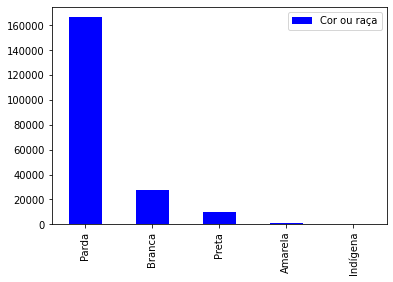

In [168]:
#Parda > Banca > Preta > Amarela > Indígina 
#Cor ou raça
#Parda - 166620
#Branca -	27640
#Preta - 9997
#Amarela -1027
#Indígena - 274

cor_da_raca = df_pessoa['Cor ou raça'].value_counts().to_frame()
cor_da_raca.plot(kind='bar',color='blue')

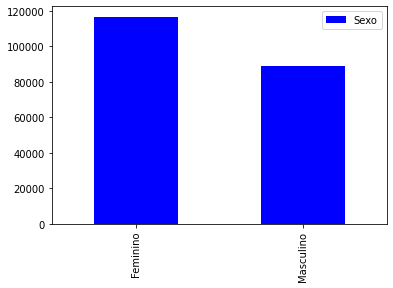

In [140]:
#Mulher > Homem
#Sexo
#Feminino -	116695
#Masculino -	88919

tipo_do_sexo = df_pessoa['Sexo'].value_counts().to_frame()

tipo_do_sexo.plot(kind='bar',color='blue')

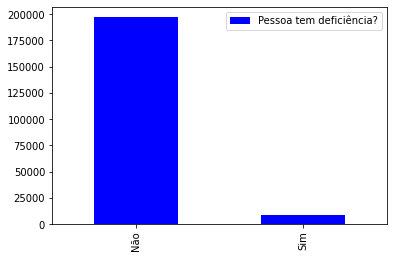

In [141]:
#Não > Sim
#Pessoa tem deficiência?
#Não -	197221
#Sim -	8393

possui_deficiencia = df_pessoa['Pessoa tem deficiência?'].value_counts().to_frame()

possui_deficiencia.plot(kind='bar',color='blue')

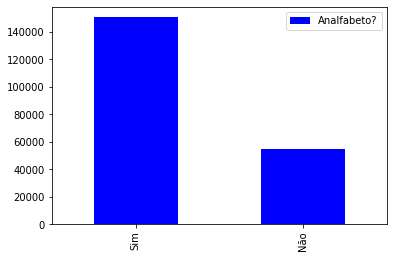

In [142]:
#Sim > Não
#Analfabeto?
#Sim -	150732
#Não -	54861

e_analfabeto = df_pessoa['Analfabeto?'].value_counts().to_frame()

e_analfabeto.plot(kind='bar',color='blue')

| Relaçao de parentesco com o RF | Quantidade |
|---|---|
Filho(a) |	91214
Pessoa Responsável pela Unidade Familia RF |	82275
Cônjuge ou companheiro(a)	| 22975
Neto(a) ou bisneto(a)	| 4139
Irmão ou irmã	| 1633
Outro parente	|1435
Pai ou mãe	| 1224
Enteado(a)	| 372
Não parente	| 170
Genro ou nora	| 133
Sogro(a)	| 44

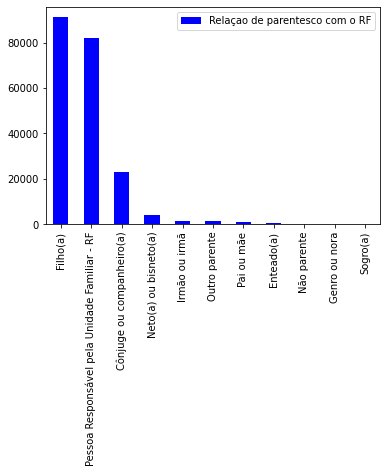

In [143]:
#Relaçao de parentesco com o RF

relacao_parentesco = df_pessoa['Relaçao de parentesco com o RF'].value_counts().to_frame()

#relacao_parentesco

relacao_parentesco.plot(kind='bar',color='blue')